In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv("Mall_Customers.csv")
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [7]:
x=df.iloc[:,3:]
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


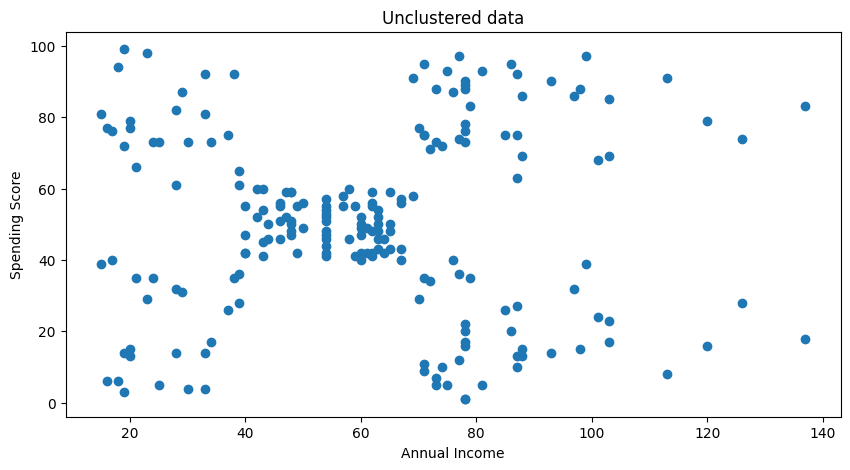

In [11]:
plt.figure(figsize=(10,5))
plt.title("Unclustered data")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.scatter(x["Annual Income (k$)"],x["Spending Score (1-100)"])

In [13]:
#elbow method is a visualization method for k means clustering to find out the  ideal from sklearnmaximum no of cluster

In [15]:
from sklearn.cluster import KMeans, AgglomerativeClustering

In [43]:
sse=[]#sum squared error
for k in range(1,16):
    km=KMeans(n_clusters=k)
    km.fit_predict(x)
    sse.append(km.inertia_)



In [35]:
sse

[269981.28,
 184609.98434090617,
 106348.37306211119,
 73679.78903948837,
 44448.45544793371,
 37455.984555160285,
 32278.293453087797,
 25349.789479440675,
 24494.456111306114,
 20290.52012987013,
 19532.842459404186,
 16477.50935755066,
 15255.561164357467,
 14087.96201786719,
 12728.694104914695]

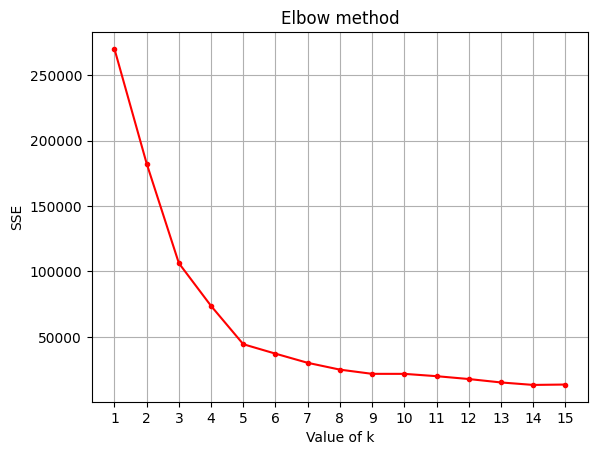

In [45]:
plt.title("Elbow method")
plt.xlabel("Value of k")
plt.ylabel("SSE")
plt.grid()
plt.xticks(range(1,16))
plt.plot(range(1,16),sse,marker='.',color="red")

In [47]:
#silhoutte analysis is a way to meausure how close each point in a clusteris to the points in the neighbouring clusters.it's a way to find out the optimal value of k during k means clustering
#its value is always between -1,1

In [49]:
from sklearn.metrics import silhouette_score

In [57]:
silh=[]
for k in range(2,16):
    km=KMeans(n_clusters=k)
    labels=km.fit_predict(x)
    score=silhouette_score(x,labels)
    silh.append(score)

In [59]:
silh

[0.2968969162503008,
 0.46761358158775435,
 0.41508307009338524,
 0.553931997444648,
 0.5375812731362782,
 0.45307746090205386,
 0.4684813876762698,
 0.44027578744625073,
 0.44933207879199133,
 0.4401971553812098,
 0.4220065396982552,
 0.3947197480071905,
 0.41503516843186333,
 0.4252181737866374]

<BarContainer object of 14 artists>

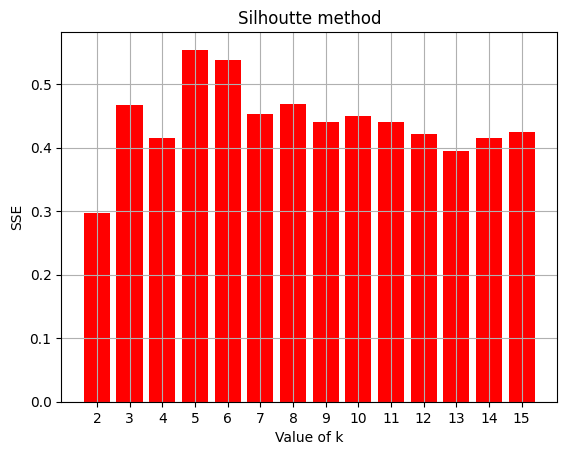

In [63]:
plt.title("Silhoutte method")
plt.xlabel("Value of k")
plt.ylabel("SSE")
plt.grid()
plt.xticks(range(2,16))
plt.bar(range(2,16),silh,color="red")

In [65]:
km=KMeans(n_clusters=5,random_state=0)

In [67]:
labels=km.fit_predict(x)

In [69]:
labels

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [77]:
km.cluster_centers_

array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636]])

In [93]:
cent = km.cluster_centers_

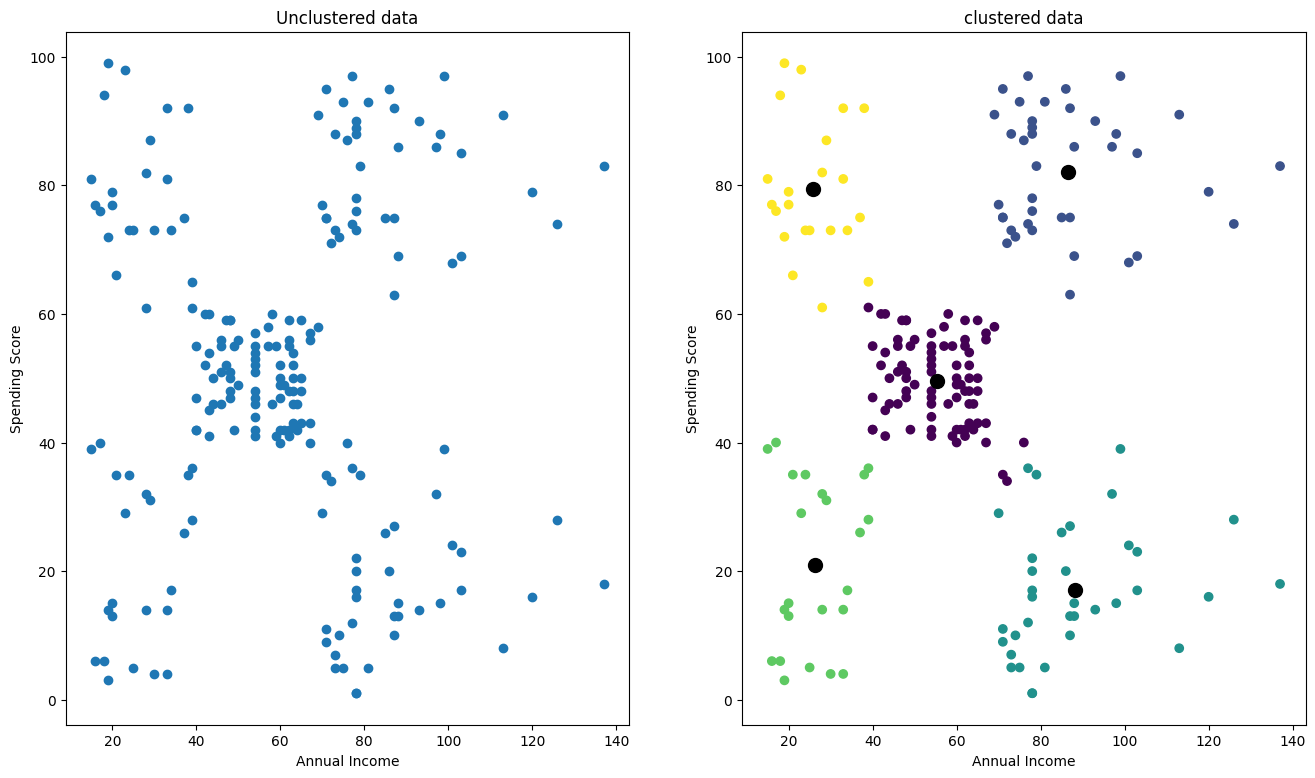

In [83]:
plt.figure(figsize=(16,9))
plt.subplot(1,2,1)
plt.title("Unclustered data")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.scatter(x["Annual Income (k$)"],x["Spending Score (1-100)"])

plt.subplot(1,2,2)
plt.title("clustered data")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.scatter(x["Annual Income (k$)"],x["Spending Score (1-100)"],c=labels)

plt.scatter(cent[:,0],cent[:,1],s=100,color='k')


In [85]:
km.inertia_

44448.45544793371

In [87]:
km.labels_

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [89]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [91]:
df[labels==4]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
1,2,Male,21,15,81
3,4,Female,23,16,77
5,6,Female,22,17,76
7,8,Female,23,18,94
9,10,Female,30,19,72
11,12,Female,35,19,99
13,14,Female,24,20,77
15,16,Male,22,20,79
17,18,Male,20,21,66
19,20,Female,35,23,98


In [95]:
agl=AgglomerativeClustering(n_clusters=5)
alabels=agl.fit_predict(x)
alabels

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

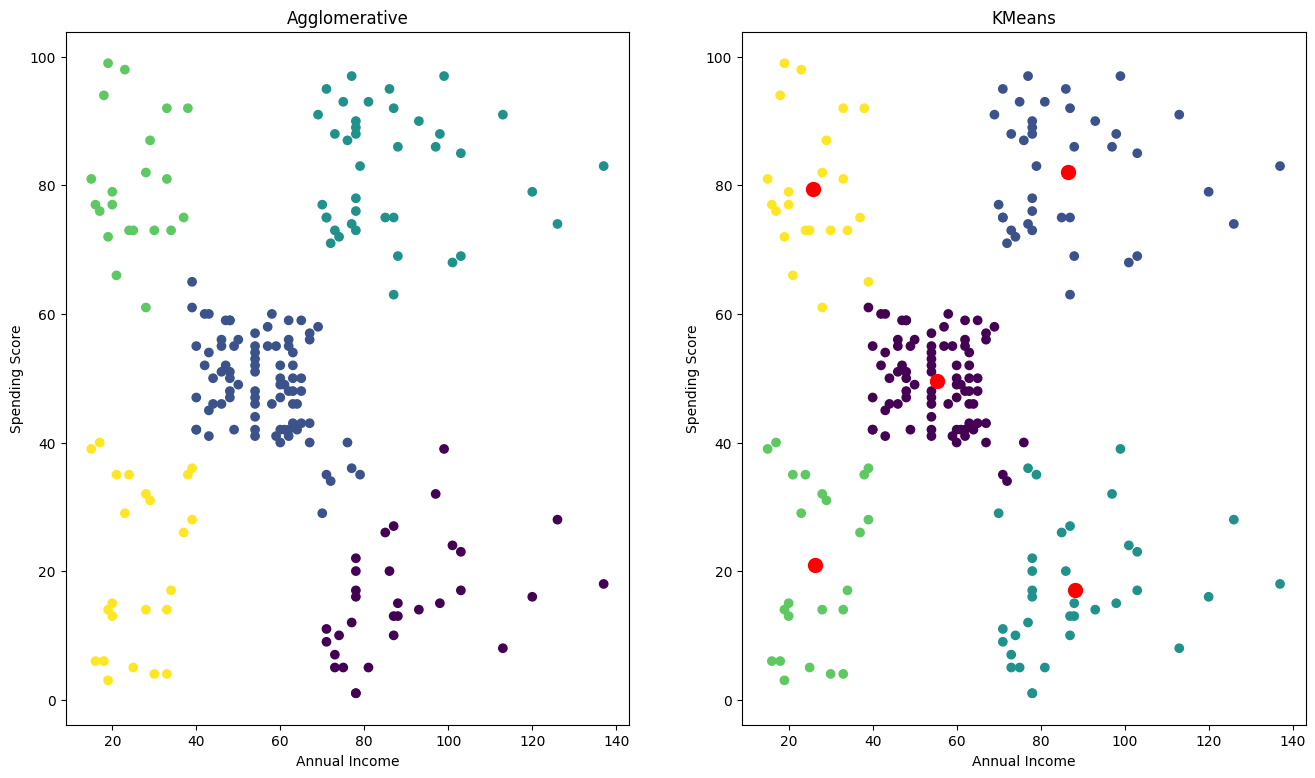

In [99]:
plt.figure(figsize=(16,9))
plt.subplot(1,2,1)
plt.title("Agglomerative")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.scatter(x["Annual Income (k$)"],x["Spending Score (1-100)"],c=alabels)

plt.subplot(1,2,2)
plt.title("KMeans")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.scatter(x["Annual Income (k$)"],x["Spending Score (1-100)"],c=labels)

plt.scatter(cent[:,0],cent[:,1],s=100,color='red')